# Data Visualization with Matlab

[Back to Lecture Overview](Overview.ipynb)

<figure align="center">
<img width="800" src="https://maucher.home.hdm-stuttgart.de/Pics/DS_Python_Libs_All.png">
</figure>

## Simple Intro-Example

In [1]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
x=np.arange(0,10,0.1)
y=np.sin(x)

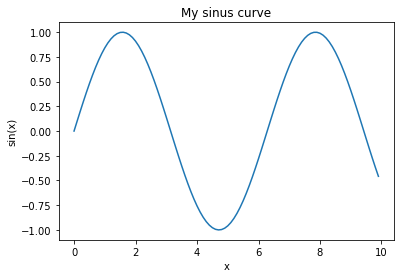

In [4]:
plt.plot(x,y)
plt.title("My sinus curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

## Styles of lines and markers

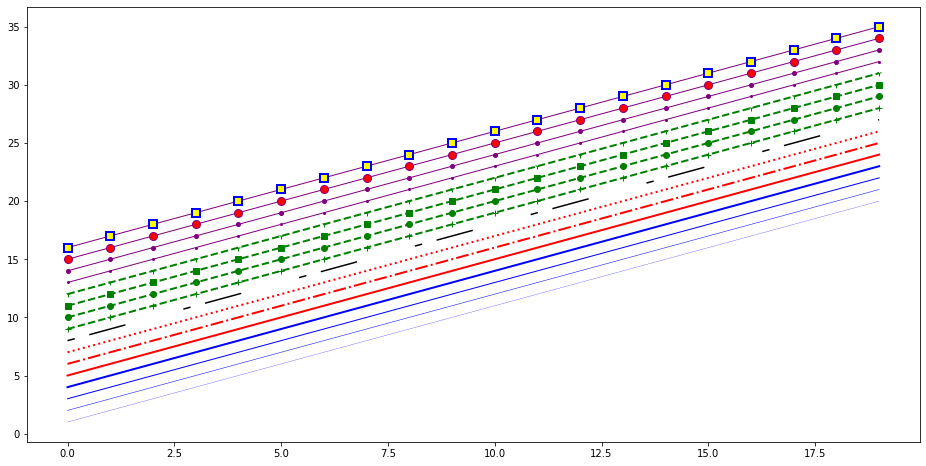

In [5]:
plt.figure(figsize=(16,8))
x=np.arange(20)
#fig, ax = plt.subplots(figsize=(16,8))

plt.plot(x, x+1, color="blue", linewidth=0.25)
plt.plot(x, x+2, color="blue", linewidth=0.50)
plt.plot(x, x+3, color="blue", linewidth=1.00)
plt.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
plt.plot(x, x+5, color="red", lw=2, linestyle='-')
plt.plot(x, x+6, color="red", lw=2, ls='-.')
plt.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = plt.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 25, 40]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
plt.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
plt.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
plt.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
plt.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
plt.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
plt.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
plt.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
plt.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Simple Line-Graphs 
The data we like to analyse in this notebook is contained in .csv file on our local machine. This type of file can be read easily by applying panda's `read_csv()`-method:


### Use Pandas for importing data from .csv

In [6]:
import pandas as pd
csvfilename="spikeeHRV.csv"
dataframe=pd.read_csv(csvfilename,sep=";")
dataframe.head()

,ID,Tag,Start,Dauer,Avg. HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF/HF,Total
0,1,16.09.16,06:05:22,0:09:16,45.883487,126.24,140.54,70.17,957,1307.66,1713,4631.27,5146.58,0.90,10123.84
1,2,15.09.16,06:02:20,0:09:00,43.153049,158.44,168.14,74.15,1031,1390.40,1862,9092.60,6849.49,1.33,16885.63
2,3,14.09.16,06:04:41,0:09:10,45.703143,159.00,182.46,74.70,660,1312.82,1817,5338.19,8879.82,0.60,15213.63
3,4,13.09.16,06:05:16,0:08:15,43.603701,137.65,151.75,76.54,1055,1376.03,1921,5403.19,5080.00,1.06,10948.85
4,5,12.09.16,06:35:00,0:10:00,39.577836,119.72,130.31,64.12,1107,1516.00,2074,4767.42,2906.28,1.64,7816.27


In [7]:
dataframe.shape

(564, 15)

Concerning the columns, only those with numeric values shall be regarded. Of non-numeric type are columns 1,2 and 3 (Tag, Startzeit, Dauer). All others are assigned to the list `cols`:

In [8]:
header=dataframe.columns
cols=list(range(4,14))
cols.append(0)
cols.sort()
header=[header[i] for i in cols]
dataframe=dataframe[header]

In [9]:
dataframe.head()

,ID,Avg. HR,RMSSD,SDNN,pNN50,RRmin,RRmean,RRmax,LF,HF,LF/HF
0,1,45.883487,126.24,140.54,70.17,957,1307.66,1713,4631.27,5146.58,0.90
1,2,43.153049,158.44,168.14,74.15,1031,1390.40,1862,9092.60,6849.49,1.33
2,3,45.703143,159.00,182.46,74.70,660,1312.82,1817,5338.19,8879.82,0.60
3,4,43.603701,137.65,151.75,76.54,1055,1376.03,1921,5403.19,5080.00,1.06
4,5,39.577836,119.72,130.31,64.12,1107,1516.00,2074,4767.42,2906.28,1.64


**Reorder rows of the dataframe:** In the original dataframe it can be seen, that data is sorted according to decreasing date. This is unusual, we like to have data sorted accourding to increasing date. This can be realized by the following adaptation:

In [10]:
hrv=dataframe.values.astype("float")
hrv[:,1:]=hrv[::-1,1:]

In [11]:
numRows=hrv.shape[0]
numCols=hrv.shape[1]
print("Number of columns in the array: ",numCols)
print("Number of rows in the array:    ",numRows)
print(hrv[:4,:])

Number of columns in the array:  11
Number of rows in the array:     564
[[   1.     53.79   78.99  149.33   20.98  635.   1115.36 1672.   5945.21
  1519.27    3.91]
 [   2.     51.94   73.45   74.31   26.91  944.   1155.12 1436.   1463.46
  1131.88    1.29]
 [   3.     42.57  121.85  135.7    38.51 1107.   1409.4  1806.   1568.39
  4165.95    0.38]
 [   4.     42.59  150.28  150.19   43.   1030.   1408.65 1858.   1551.28
  5283.34    0.29]]


### Visualize simple Line-Graphs
For the visualisation of data with `matplotlib` it's `pyplot`-module is required ([http://matplotlib.org/users/pyplot_tutorial.html#pyplot-tutorial](http://matplotlib.org/users/pyplot_tutorial.html#pyplot-tutorial)). We import it and assign the alias `plt``. In the case that the matplotlib-figures shall be displayed in the jupyter notebook `%matplotlib inline` must be placed before the import. Otherwise the figures are displayed in separate windows. In this case they can be applied in an interactive manner, e.g. the plots can be zoomed.

For plotting a 2-dimensional curve, the 2-d points which define the curve must be assigned to the _pyplot_ function `plot()`. The x-coordinates of the points are assigned to the first parameter of `plot()` and the y-coordinates are assigned to the second parameter. Both coordinate-sets must be 1-dimensional lists or 1-dimensional NumPy-arrays of equal length. A label can be assigned to the curve. This label appears in the figure's legend in the case that `plt.legend()` is applied. 

In [12]:
hrv

array([[   1.  ,   53.79,   78.99, ..., 5945.21, 1519.27,    3.91],
       [   2.  ,   51.94,   73.45, ..., 1463.46, 1131.88,    1.29],
       [   3.  ,   42.57,  121.85, ..., 1568.39, 4165.95,    0.38],
       ...,
       [ 562.  ,   45.7 ,  159.  , ..., 5338.19, 8879.82,    0.6 ],
       [ 563.  ,   43.15,  158.44, ..., 9092.6 , 6849.49,    1.33],
       [ 564.  ,   45.88,  126.24, ..., 4631.27, 5146.58,    0.9 ]])

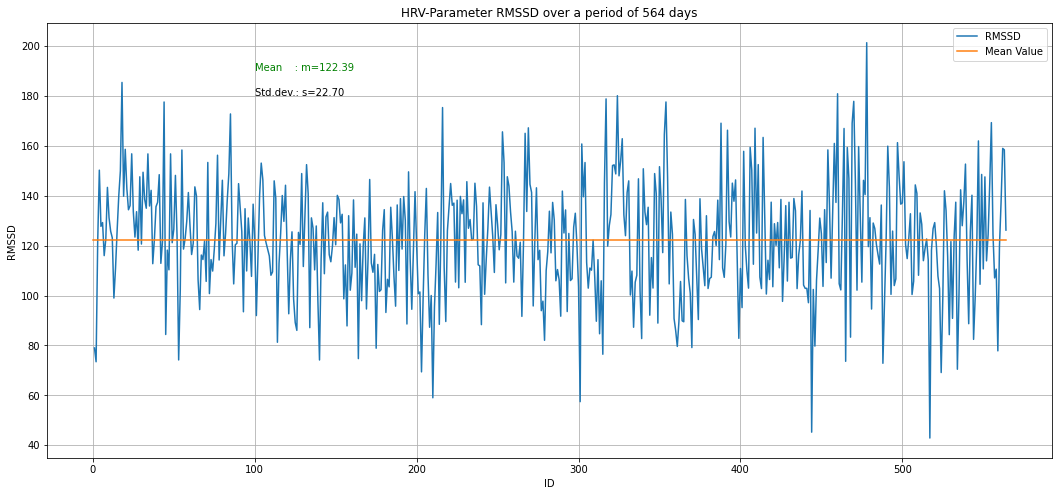

In [13]:
xName="ID"
yName="RMSSD"
xpar=header.index(xName) #Determine the column index of the parameter on the x-axis
ypar=header.index(yName) #Determine the column index of the parameter on the y-axis  
mean = hrv.mean(axis=0)[ypar]
std = hrv.std(axis=0)[ypar]
plt.figure(figsize=(18,8)) #optional, e.g. for defining a non-default figure-size
plt.plot(hrv[:,xpar],hrv[:,ypar],label=yName)
plt.grid(True) #plot a grid
#plt.hold(True) #for plotting more than one curve into a single figure
plt.xlabel(xName)
plt.ylabel(yName)
plt.title("HRV-Parameter %s over a period of %3d days"%(yName,numRows)) #Define title of figure
plt.text(100,190,r"Mean    : m=%3.2f"%(mean),color="g")
plt.text(100,180,r"Std.dev.: s=%3.2f"%(std))
plt.plot([0,numRows],[mean,mean],label="Mean Value")
plt.legend() #plot a legend with the curve's label
plt.show() #necessary for displaying the figure in an external window

## Multiple graphs in a single plot
After setting 
`plt.hold(True)`
multiple curves can be added to a single figure by just repeatedly calling the `plt.plot()` function with the curve-specific coordinates. In order to distinguish the curves individual colors, markers, linestyles or linewidths can be assigned.

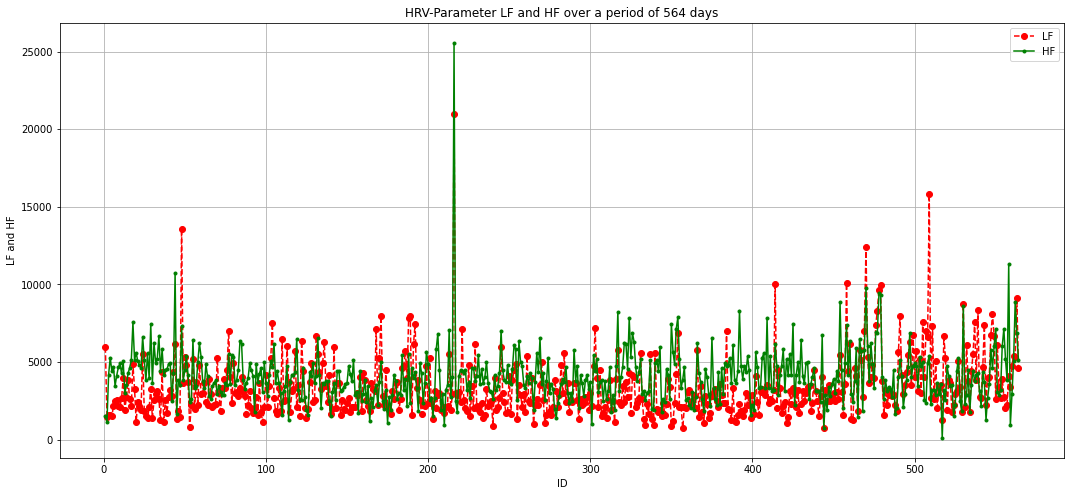

In [14]:
xName="ID"
y1Name="LF"
y2Name="HF"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
plt.figure(figsize=(18,8))
plt.plot(hrv[:,xpar],hrv[:,y1par],label=y1Name,color='r',marker='o',linestyle='--')
plt.grid(True)
#plt.hold(True)
plt.plot(hrv[:,xpar],hrv[:,y2par],label=y2Name,color='g',marker='.',linestyle='-')
plt.xlabel(header[xpar])
plt.ylabel(y1Name+" and "+y2Name)
plt.title("HRV-Parameter %s and %s over a period of %3d days"%(y1Name,y2Name,numRows)) #Define title of figure
plt.legend()
plt.show()

### Multiple graphs in a single plot with different value ranges

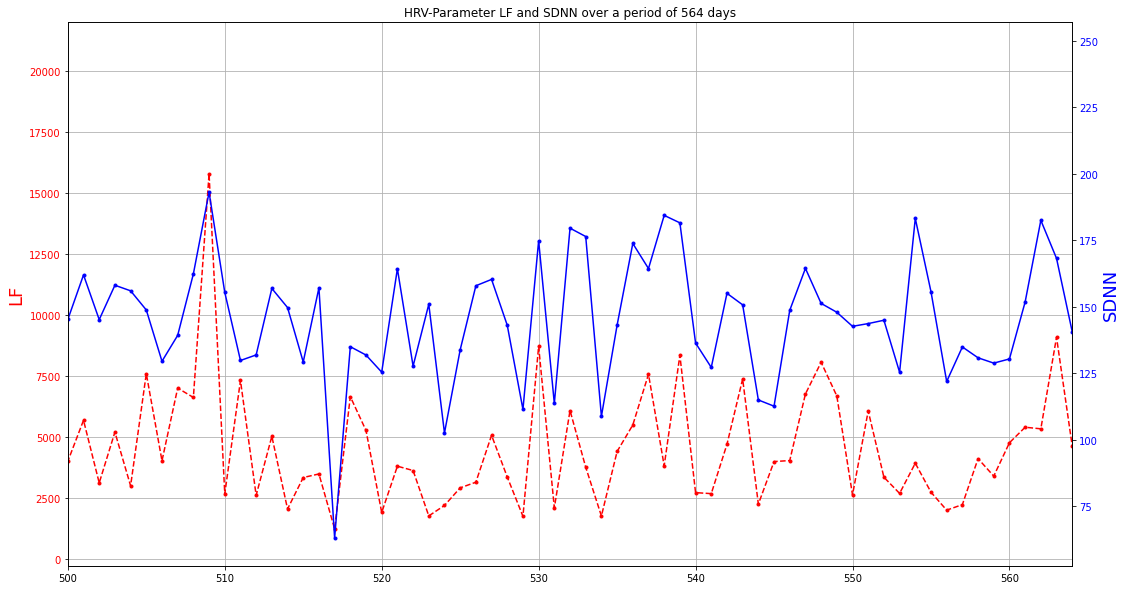

In [15]:
xName="ID"
y1Name="LF"
y2Name="SDNN"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
fig, ax1 = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
ax1.plot(hrv[:,xpar],hrv[:,y1par],label=y1Name,color='r',marker='.',linestyle='--')
ax1.set_ylabel(y1Name, fontsize=18, color="r")
for label in ax1.get_yticklabels():
    label.set_color("r")
ax1.grid(True)
    
ax2 = ax1.twinx()    
ax2.plot(hrv[:,xpar],hrv[:,y2par],label=y2Name,color='b',marker='.',linestyle='-')
ax2.set_xlabel(header[xpar])
ax2.set_ylabel(y2Name, fontsize=18, color="b")
ax2.set_ylabel(y2Name)
for label in ax2.get_yticklabels():
    label.set_color("b")
plt.title("HRV-Parameter %s and %s over a period of %3d days"%(y1Name,y2Name,numRows)) #Define title of figure
Xmin=500
Xmax=numRows
plt.xlim([Xmin,Xmax])

plt.show()

## Multiple Plots in a single figure
Multiple plots can be arranged in a single figure by applying the `pyplot`-function `subplot()`. The first parameter in `subplot()` defines the number of rows, and the second parameter defines the number of columns of the matrix, in which the subplots shall be arranged. The third parameter of `subplot()` defines the index of the matrix-element into which the next plot shall be placed. The subplot in the top-left has the number 1 and counting from left to right and from top to bottom the subplot in the lowest right has the maximum index.

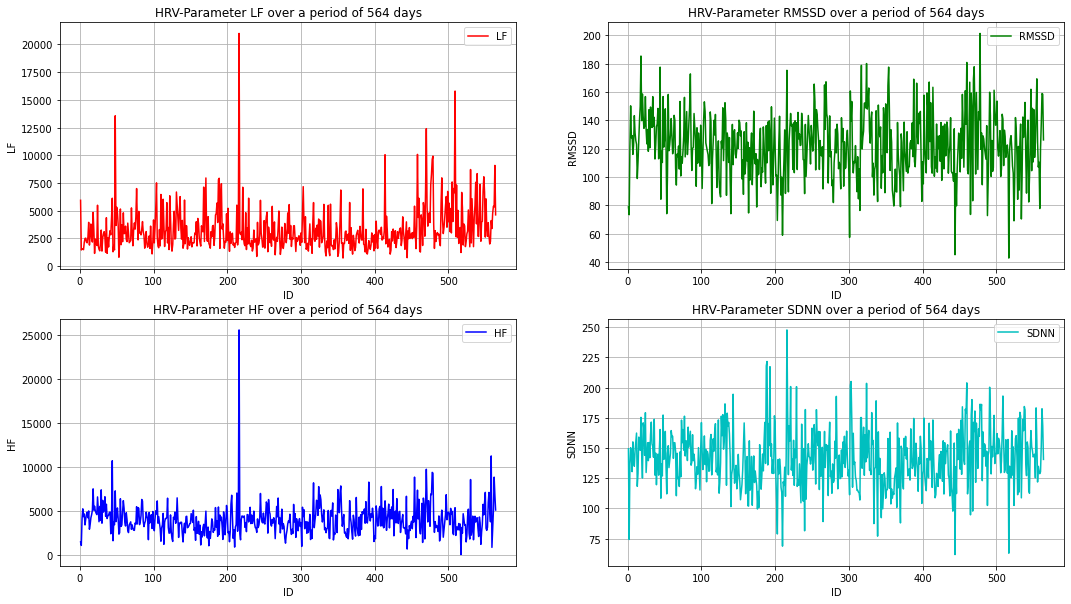

In [16]:
xName="ID"
y1Name="LF"
y3Name="HF"
y2Name="RMSSD"
y4Name="SDNN"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
y3par=header.index(y3Name)
y4par=header.index(y4Name)
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(hrv[:,xpar],hrv[:,y1par],label=y1Name,color='r')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y1Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y1Name,numRows)) #Define title of figure
plt.legend()
plt.subplot(2,2,2)
plt.plot(hrv[:,xpar],hrv[:,y2par],label=y2Name,color='g')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y2Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y2Name,numRows)) #Define title of figure
plt.legend()
plt.subplot(2,2,3)
plt.plot(hrv[:,xpar],hrv[:,y3par],label=y3Name,color='b')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y3Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y3Name,numRows)) #Define title of figure
plt.legend()
plt.subplot(2,2,4)
plt.plot(hrv[:,xpar],hrv[:,y4par],label=y4Name,color='c')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y4Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y4Name,numRows)) #Define title of figure
plt.legend()
plt.show()

## Scatter plots
Sets of 2-dimensional points can be represented in scatter-plots. The same function `plot()` is applied as in the case of plotting curves. The difference is just, that for scatter-plots the individual points are not connected by a line. For this set `linestyle="None"` in the `plot()`-function. In the example below the x- and y-range shall not be automatically determined by the minimum and maximum values of the data. Instead it shall be set manually. This is done by specifying the desired ranges as parameters in `plt.xlim()` and `plt.ylim()`, respectively.

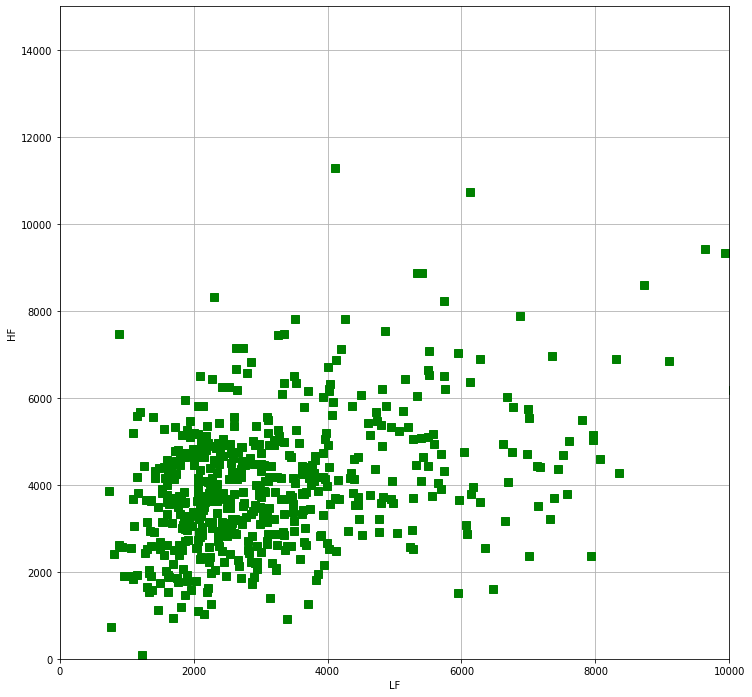

In [17]:
y1Name="LF"
y2Name="HF"
y1par=header.index(y1Name)
y2par=header.index(y2Name)
plt.figure(figsize=(12,12))
plt.plot(hrv[:,y1par],hrv[:,y2par],color='g',linestyle="None",marker="s",markersize=8)
plt.grid(True)
plt.xlabel(y1Name)
plt.ylabel(y2Name)
plt.xlim([0,10000])  #specifiy the x-range to display
plt.ylim([0,15000])  #specify the y-range to display
plt.show()

## Bar Charts

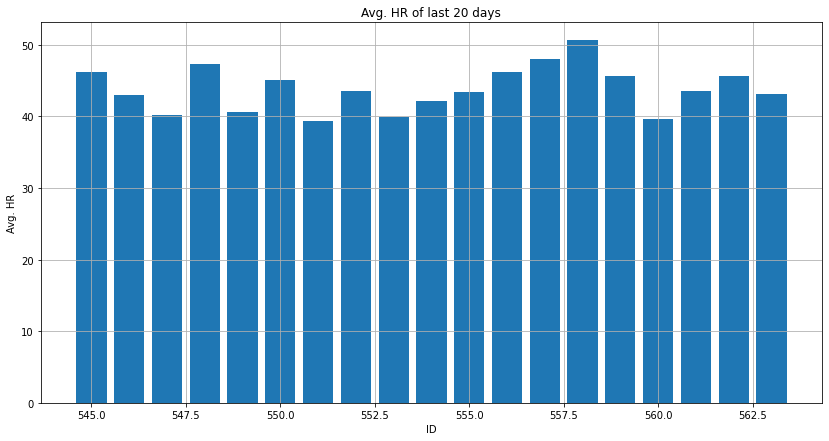

In [18]:
xName="ID"
yName="Avg. HR"
xpar=header.index(xName)
ypar=header.index(yName)
NumEl=20
plt.figure(figsize=(14,7))
plt.bar(hrv[-NumEl:-1,xpar],hrv[-NumEl:-1,ypar])
plt.grid(True)
plt.xlabel(xName)
plt.ylabel(yName)
plt.title("%s of last %d days"%(yName,NumEl))
plt.show()

## Histograms

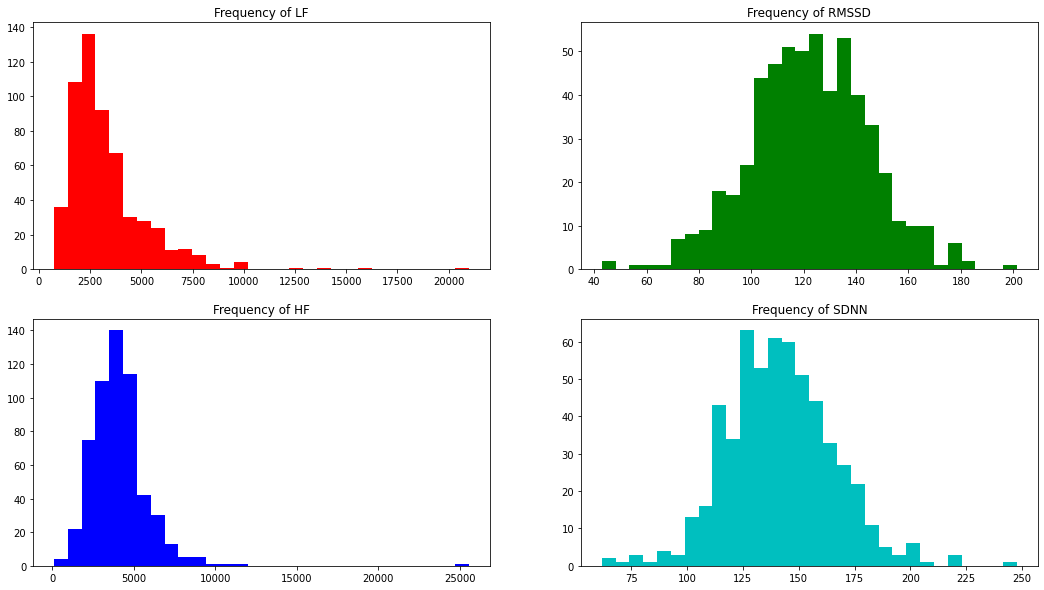

In [19]:
xName="ID"
y1Name="LF"
y3Name="HF"
y2Name="RMSSD"
y4Name="SDNN"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
y3par=header.index(y3Name)
y4par=header.index(y4Name)
B=30
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.hist(hrv[:,y1par],B,color='r')
plt.title("Frequency of %s"%y1Name)
plt.subplot(2,2,2)
plt.hist(hrv[:,y2par],B,color='g')
plt.title("Frequency of %s"%y2Name)
plt.subplot(2,2,3)
plt.hist(hrv[:,y3par],B,color='b')
plt.title("Frequency of %s"%y3Name)
plt.subplot(2,2,4)
plt.hist(hrv[:,y4par],B,color='c')
plt.title("Frequency of %s"%y4Name)
plt.show()

## Visual Correlation Analysis

In [20]:
print(header)

['ID', 'Avg. HR', 'RMSSD', 'SDNN', 'pNN50', 'RRmin', 'RRmean', 'RRmax', 'LF', 'HF', 'LF/HF']


In [21]:
hrvSubset=['Avg. HR','RMSSD', 'SDNN','LF', 'HF']
numSubs=len(hrvSubset)

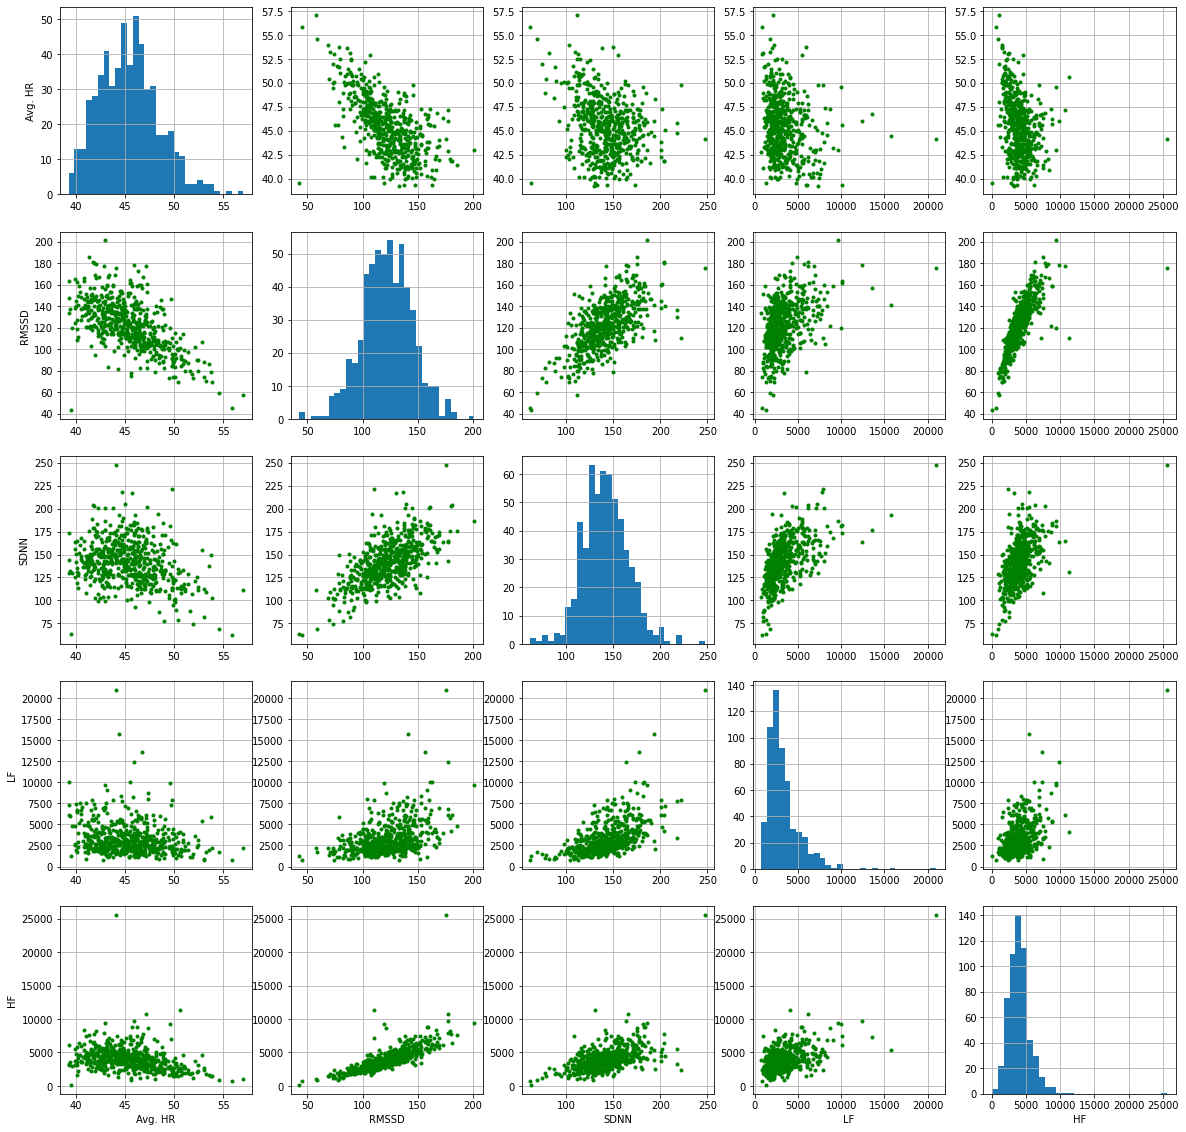

In [22]:
plt.figure(figsize=(20,20))
for row in range(numSubs):
    y1Name=hrvSubset[row]
    y1par=header.index(y1Name)
    for col in range(numSubs):
        plotCount=row*numSubs+col+1
        plt.subplot(numSubs,numSubs,plotCount)
        x1Name=hrvSubset[col]
        x1par=header.index(x1Name)
        if row==col:
            plt.hist(hrv[:,x1par],B)
        else:
            plt.plot(hrv[:,x1par],hrv[:,y1par],color='g',linestyle="None",marker=".",markersize=6)
        plt.grid(True)
        if row==numSubs-1:
            plt.xlabel(x1Name)
        if col==0:
            plt.ylabel(y1Name)
plt.show()